In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

print( np.__version__ )
print( pd.__version__ )


1.18.1
1.0.1


Load The file sessions.csv 

Set the col names to 'user','dt','time','ip','url'

In [16]:
header_list = ['user','dt','time','ip','url']
data = pd.read_csv("sessions.csv", names=header_list)

display dataframe info

In [3]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   user    10000 non-null  int64 
 1   dt      10000 non-null  object
 2   time    10000 non-null  object
 3   ip      10000 non-null  object
 4   url     10000 non-null  object
dtypes: int64(1), object(4)
memory usage: 390.8+ KB


display 10 rowsd

In [4]:
data.head(10)

,user,dt,time,ip,url
0,123765,16/3/2017,13:44,123.41.24.13,admin.html
1,123649,6/3/2017,13:29,123.41.24.13,home.html
2,123740,14/3/2017,15:51,145.41.90.13,orders.html
3,123811,27/3/2017,9:16,123.23.24.13,home.html
4,123753,19/3/2017,17:54,145.41.24.13,customres.html
5,123770,5/3/2017,13:57,145.23.24.17,home.html
6,123934,6/3/2017,13:25,145.23.90.17,notfound.html
7,123532,23/3/2017,18:56,123.41.90.13,home.html
8,123862,7/3/2017,16:44,123.23.90.17,notfound.html
9,123444,22/3/2017,11:42,123.23.24.13,search.html


display only IP and URL

In [5]:
data[['ip', 'url']]

,ip,url
0,123.41.24.13,admin.html
1,123.41.24.13,home.html
2,145.41.90.13,orders.html
3,123.23.24.13,home.html
4,145.41.24.13,customres.html
...,...,...
9995,225.202.99.12,results.html
9996,225.202.99.12,results.html
9997,225.202.99.12,results.html
9998,225.202.99.12,results.html


display the IPs (unique)

In [6]:
data.ip.unique()

array(['123.41.24.13', '145.41.90.13', '123.23.24.13', '145.41.24.13',
       '145.23.24.17', '145.23.90.17', '123.41.90.13', '123.23.90.17',
       '123.23.24.17', '145.23.90.13', '123.41.90.17', '123.41.24.17',
       '145.41.24.17', '123.23.90.13', '145.41.90.17', '145.23.24.13',
       '145.41.134.18', '145.41.24.18', '145.41.134.17', '145.72.24.17',
       '170.72.134.18', '170.41.24.17', '170.41.134.18', '170.41.134.17',
       '145.72.24.18', '145.72.134.17', '170.41.24.18', '170.72.24.18',
       '145.72.134.18', '170.72.134.17', '170.72.24.17', '170.134.11.18',
       '212.134.134.18', '212.72.11.18', '212.134.11.19', '170.72.11.19',
       '170.72.11.18', '212.134.134.19', '170.134.134.18',
       '212.72.134.18', '170.134.11.19', '170.134.134.19',
       '212.72.134.19', '212.72.11.19', '170.72.134.19', '212.134.11.18',
       '225.202.11.19', '225.202.99.12', '225.134.99.12', '212.134.99.19',
       '212.202.99.19', '212.202.11.19', '212.202.99.12', '212.134.99.12',
       

Count the rows per date

In [17]:
data.groupby('dt').count()

,user,time,ip,url
dt,,,,
1/3/2017,335,335,335,335
10/3/2017,27,27,27,27
11/3/2017,28,28,28,28
12/3/2017,334,334,334,334
13/3/2017,577,577,577,577
14/3/2017,618,618,618,618
15/3/2017,315,315,315,315
16/3/2017,319,319,319,319
17/3/2017,33,33,33,33


how many times users visited each url?

In [9]:
data.groupby('url').count()

,user,dt,time,ip
url,,,,
admin.html,2235,2235,2235,2235
customres.html,120,120,120,120
home.html,150,150,150,150
newuser.html,1262,1262,1262,1262
notfound.html,126,126,126,126
orders.html,520,520,520,520
results.html,2803,2803,2803,2803
search.html,2784,2784,2784,2784


Create a new column with the week day name

In [10]:
col = pd.to_datetime(data['dt'])
data['day_of_week'] = col.dt.day_name()

How many sessions per day?

In [53]:
# nunique() returns Series
sessions = data.groupby(by='dt')['ip'].nunique()
# or aggregation - agg() - that return DataFrame
df = data.sort_values('dt').groupby(by='dt', as_index=False).agg({'ip': pd.Series.nunique})

How many sessions per day per IP

In [54]:
df = data.groupby(by='dt', as_index=False).agg({'ip': pd.Series.nunique})
df.reset_index()

,index,dt,ip
0,0,1/3/2017,59
1,1,10/3/2017,1
2,2,11/3/2017,1
3,3,12/3/2017,61
4,4,13/3/2017,60
5,5,14/3/2017,60
6,6,15/3/2017,60
7,7,16/3/2017,59
8,8,17/3/2017,1
9,9,18/3/2017,1


Create histogram for day distribution

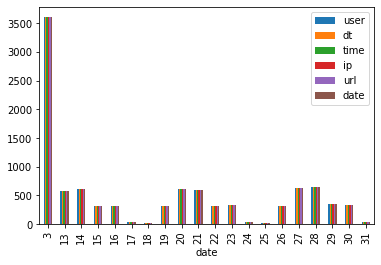

In [56]:
# data['date'] = data['dt'].astype("datetime64")
# data.groupby([data["date"].dt.day]).count().plot(kind="bar")

df.index.name = None
df.plot()


Add a new column weekday for Friday and Saturday (True if the weekday is Sat or Fri)

In [57]:
data['ip'].count()

10000